In [88]:
import pandas as pd


In [111]:
#Load score
news = pd.read_csv('final.csv' , encoding='latin-1')


In [112]:
#Drop column
news = news.drop('Unnamed: 0', axis=1)


In [113]:
news['final_date'] = pd.to_datetime(news['final_date'])
news['week'] = news['final_date'].dt.week
news['year'] = news['final_date'].dt.year


In [114]:
news.year.value_counts()

2014    70500
2012    63034
2013    62500
2015    34483
2016    31517
2017    21798
1990        1
Name: year, dtype: int64

In [117]:
#Need as.index = FALSE in order to get the grouped column as a column not an index
#Aggregate to daily level by summing across all sentiment count and score
news2 =   news.groupby(['year','week'] , as_index = False ).agg({'score': 'sum' , 
                                                'Harvard_IV_final': 'sum' ,
                                                'Negative_final': 'sum'  ,
                                                'Positive_final': 'sum' ,
                                                'Uncertainty_final': 'sum' ,
                                                'Litigious_final' : 'sum' ,
                                                'Constraining_final' : 'sum' ,
                                                'Superfluous_final' : 'sum' , 
                                                'Interesting_final' : 'sum' ,
                                                 'Modal_final': 'sum' , 
                                                'Irr_Verb_final': 'sum' ,
                                                'Harvard_IV_final': 'sum'
                               } 
                              )

#Drop this column ... need to fix later when cleaning the file
#news2 = news2.drop('Constraining_final', axis=1)
news2=news2.iloc[1:,:]


In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(news2)
std=pd.DataFrame(scaler.transform(news2)).iloc[:,2:]
#pd.concat([std,news2.iloc[:,2:]],axis=1)
time=news2.iloc[:,:2]
std.reset_index()
time.index=range(len(time))
stddata=pd.concat([time,std],axis=1)
stddata.columns=news2.columns

In [142]:
stddata.head()

,year,week,Uncertainty_final,Litigious_final,Modal_final,Interesting_final,Superfluous_final,Negative_final,Positive_final,Irr_Verb_final,Constraining_final,score,Harvard_IV_final
0,2012,1,0.310022,-0.213097,0.230021,0.179033,-0.274486,0.006074,0.221248,0.133932,0.064997,0.104170,0.101434
1,2012,2,0.798152,0.506023,0.623985,0.364827,-0.274486,0.722638,0.138642,0.594384,0.289272,0.280256,0.285541
2,2012,3,0.170557,0.300560,-0.196773,0.392498,-0.274486,0.385432,0.056035,-0.134665,-0.832104,0.187338,0.379209
3,2012,4,0.100824,0.300560,0.065870,0.562479,-0.274486,0.532959,0.799491,0.939724,-0.159278,0.275020,0.595615
4,2012,5,0.449488,0.300560,1.017949,0.890583,3.643175,0.775327,0.469066,1.169950,-0.832104,0.551671,0.837860


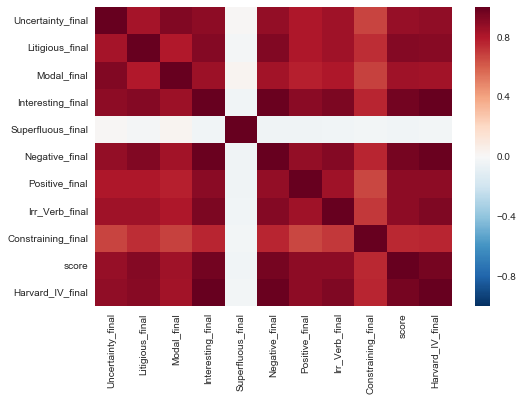

In [202]:
import seaborn as sns
corr = stddata.iloc[:,2:].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

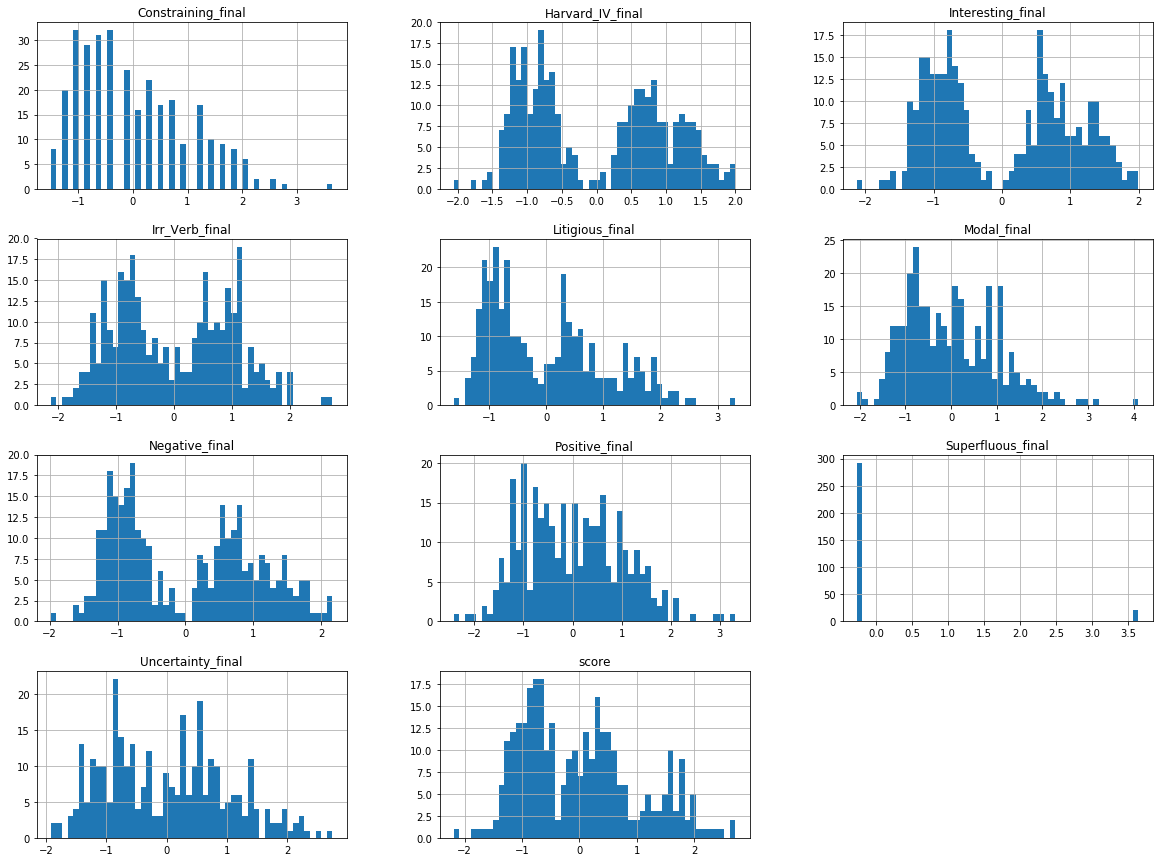

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
trend.iloc[:,2:].hist(bins=3, figsize=(20,15))
plt.savefig('distribution.png')
plt.show()

In [186]:
stddata.to_csv('standardized.csv')

In [ ]:
newave=news.groupby(['year', 'week'], as_index=False)[vec].mean()


In [143]:
sectors = pd.read_csv('sectors.csv' , encoding='latin-1')
sectors['Date'] = pd.to_datetime(sectors['Date'])

In [144]:
sectors=sectors.dropna()
sectors['week'] = sectors['Date'].dt.week
sectors['year'] = sectors['Date'].dt.year

In [145]:
vec=sectors.columns.tolist()[1:-2]

In [146]:
average=sectors.groupby(['year', 'week'], as_index=False)[vec].mean()

In [147]:
averages=average.shift()
index=average.iloc[1:,2:]
indexs=averages.iloc[1:,2:]
#x=pd.concat([average,averages],axis=1)

In [180]:
average.head(3)

,year,week,XRT US,XLK US,XLE US,XLF US,XLU US,XLV US,XLP US,XLY US,XLI US
0,2008,1,13.420083,19.511667,61.3250,16.261667,34.208333,29.373333,25.766667,26.901667,30.531667
1,2008,2,13.346250,19.667500,67.6075,14.852500,34.777500,29.045000,26.152500,25.742500,29.880000
2,2008,3,14.808000,23.870000,72.0220,21.616000,41.888000,35.538000,27.690000,29.976000,35.628000


In [179]:
averages.head(3)

,year,week,XRT US,XLK US,XLE US,XLF US,XLU US,XLV US,XLP US,XLY US,XLI US
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008.0,1.0,13.420083,19.511667,61.3250,16.261667,34.208333,29.373333,25.766667,26.901667,30.531667
2,2008.0,2.0,13.346250,19.667500,67.6075,14.852500,34.777500,29.045000,26.152500,25.742500,29.880000


In [148]:
label=(index.subtract(indexs, fill_value=0)>0)*1
dates=average.iloc[1:,:2]
trend=pd.concat([dates,label],axis=1)

In [187]:
trend.to_csv('trend.csv')

In [150]:
merged = pd.merge(stddata,trend, on=['year','week'])

In [151]:
merged.head()


,year,week,Uncertainty_final,Litigious_final,Modal_final,Interesting_final,Superfluous_final,Negative_final,Positive_final,Irr_Verb_final,...,Harvard_IV_final,XRT US,XLK US,XLE US,XLF US,XLU US,XLV US,XLP US,XLY US,XLI US
0,2012,1,0.310022,-0.213097,0.230021,0.179033,-0.274486,0.006074,0.221248,0.133932,...,0.101434,1,1,1,1,1,1,1,1,1
1,2012,2,0.798152,0.506023,0.623985,0.364827,-0.274486,0.722638,0.138642,0.594384,...,0.285541,1,1,1,1,1,1,1,1,1
2,2012,3,0.170557,0.300560,-0.196773,0.392498,-0.274486,0.385432,0.056035,-0.134665,...,0.379209,0,0,0,0,0,0,0,0,0
3,2012,4,0.100824,0.300560,0.065870,0.562479,-0.274486,0.532959,0.799491,0.939724,...,0.595615,1,1,1,1,1,0,1,1,1
4,2012,5,0.449488,0.300560,1.017949,0.890583,3.643175,0.775327,0.469066,1.169950,...,0.837860,1,1,1,1,1,1,1,1,1


In [156]:
feature=merged.columns[2:13]
response=merged.columns[13:]

In [162]:
train=merged[merged['year'] .isin([2012,2013,2014,2015])]

In [163]:
test=merged[merged['year'] .isin([2016,2017])]

In [164]:
X_train = train[feature]
y_train = train[response]
X_test =test [feature]
y_test =test [response]

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def randomforest(y_train,y_test):
    global RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100,max_depth=5)
    rf.fit(X_train, y_train)
    predicted = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    print("Random Forest Model Accuracy: %.2f%%" % (accuracy * 100.0))
randomforest(y_train.iloc[:,1],y_test.iloc[:,1])

Random Forest Model Accuracy: 49.52%


In [172]:
from sklearn.linear_model import LogisticRegression
def lr(y_train,y_test):
    global logistic
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test, y_test)
    print("Logistic Regression Model Accuracy: %.2f%%" % (score * 100.0))
lr(y_train.iloc[:,1],y_test.iloc[:,1])

Logistic Regression Model Accuracy: 54.29%


In [182]:
lr(y_train.iloc[:,2],y_test.iloc[:,2])
randomforest(y_train.iloc[:,2],y_test.iloc[:,2])

Logistic Regression Model Accuracy: 50.48%
Logistic Regression Model Accuracy: 50.48%


In [174]:
lr(y_train.iloc[:,3],y_test.iloc[:,3])

Logistic Regression Model Accuracy: 60.00%


In [185]:
randomforest(y_train.iloc[:,2],y_test.iloc[:,2])

Random Forest Model Accuracy: 47.62%


In [188]:
corr_matrix = stddata.corr()

In [190]:
corr_matrix["Uncertainty_final"].sort_values(ascending=False)

Uncertainty_final     1.000000
Modal_final           0.927546
Interesting_final     0.894846
Harvard_IV_final      0.885855
Negative_final        0.882471
score                 0.873606
Irr_Verb_final        0.849510
Litigious_final       0.833377
Positive_final        0.811488
Constraining_final    0.679436
Superfluous_final     0.012884
week                 -0.122773
year                 -0.661157
Name: Uncertainty_final, dtype: float64